In [1]:
import os.path

import numpy as np
import librosa
from preprocess.process_utils import get_file_dict, wav_split_overlap
import torch
import torchaudio
from tqdm import tqdm


def MODMA_P(path: str, duration=10, resample_rate=16000, threshold=1, overlap=2.5):
    """
    使用torch读取音频数据，加速读取 推荐使用，（将小于10s的短音频补零至10s，将大于10s的音频分成若干段(包含重叠)）
    Args:
        threshold: 对于多出来的部分，大于threshold补零，小于threshold截断
        order: [1,2,3] 1:13阶MFCC 2:13阶MFCC+一阶差分 3:13阶MFCC+一阶差分+二阶差分
        extra: 是否保存分段信息(MODMA)
        path: 音频文件存放路径
        code: one-hot编码
        frame_length: 帧长
        duration: 划分时长
        resample_rate: 重采样
        overlap: 重叠时长

    Returns:

    """
    dataset = path.split('/')[-1]
    print(f"fastV1: {dataset}")
    wav_dict = get_file_dict(path=path)
    extra_info = {}
    sample_wav = wav_dict[list(wav_dict.keys())[0]][0]
    _, sr = librosa.load(sample_wav, sr=None)
    expect_length = sr * duration
    for key in (wav_dict.keys()):
        print(f"process: {key}")
        slice_num = 0
        stack_data = None
        for wav in tqdm(wav_dict[key]):
            data, sr = torchaudio.load(wav)
            actual_length = data.shape[1]
            if actual_length < expect_length:
                data = torch.cat([data, torch.zeros([1, expect_length - actual_length])], dim=1)
                slice_num += 1
            elif actual_length > expect_length:
                data, split_num = wav_split_overlap(data, sr, threshold, duration, overlap)
                slice_num += split_num
            else:
                slice_num += 1
            if stack_data is None:
                stack_data = data
            else:
                stack_data = torch.cat([stack_data, data], dim=0)
        extra_info[key] = slice_num
        stack_data = stack_data.numpy().astype(np.float32)
        if sr != resample_rate:
            stack_data = librosa.resample(stack_data, orig_sr=sr, target_sr=resample_rate)
        stack_data = torch.Tensor(stack_data)
        for i in range(stack_data.shape[0]):
            if not os.path.exists(f"x/MODMA/{key}/"):
                os.mkdir(f"x/MODMA/{key}/")
            index = "{:0>3d}".format(i)
            torchaudio.save(f"x/MODMA/{key}/{index}.wav",stack_data[i].unsqueeze(0), resample_rate)

MODMA_P(path="../preprocess/MODMA/")


fastV1: 
process: 02010001


100%|██████████| 29/29 [00:00<00:00, 279.78it/s]


process: 02010002


100%|██████████| 29/29 [00:00<00:00, 148.79it/s]


process: 02010003


100%|██████████| 29/29 [00:00<00:00, 222.11it/s]


process: 02010004


100%|██████████| 24/24 [00:00<00:00, 166.07it/s]


process: 02010005


100%|██████████| 29/29 [00:00<00:00, 111.48it/s]


process: 02010006


100%|██████████| 29/29 [00:00<00:00, 177.42it/s]


process: 02010008


100%|██████████| 29/29 [00:00<00:00, 131.07it/s]


process: 02010009


100%|██████████| 29/29 [00:00<00:00, 206.36it/s]


process: 02010010


100%|██████████| 29/29 [00:00<00:00, 204.91it/s]


process: 02010011


100%|██████████| 29/29 [00:00<00:00, 404.12it/s]


process: 02010012


100%|██████████| 29/29 [00:00<00:00, 181.86it/s]


process: 02010013


100%|██████████| 29/29 [00:00<00:00, 342.32it/s]


process: 02010014


100%|██████████| 29/29 [00:00<00:00, 55.74it/s]


process: 02010015


100%|██████████| 29/29 [00:00<00:00, 58.66it/s]


process: 02010018


100%|██████████| 29/29 [00:00<00:00, 63.12it/s] 


process: 02010022


100%|██████████| 29/29 [00:00<00:00, 92.67it/s] 


process: 02010023


100%|██████████| 29/29 [00:00<00:00, 94.47it/s] 


process: 02010024


100%|██████████| 29/29 [00:00<00:00, 79.28it/s] 


process: 02010025


100%|██████████| 29/29 [00:00<00:00, 51.05it/s]


process: 02010034


100%|██████████| 29/29 [00:00<00:00, 106.97it/s]


process: 02010036


100%|██████████| 29/29 [00:00<00:00, 72.38it/s]


process: 02010037


100%|██████████| 29/29 [00:00<00:00, 71.84it/s]


process: 02010039


100%|██████████| 29/29 [00:00<00:00, 84.58it/s]


process: 02020004


100%|██████████| 29/29 [00:00<00:00, 91.50it/s] 


process: 02020007


100%|██████████| 29/29 [00:00<00:00, 61.52it/s]


process: 02020008


100%|██████████| 29/29 [00:00<00:00, 66.13it/s]


process: 02020010


100%|██████████| 29/29 [00:00<00:00, 48.74it/s]


process: 02020011


100%|██████████| 29/29 [00:00<00:00, 65.09it/s]


process: 02020014


100%|██████████| 29/29 [00:00<00:00, 67.67it/s]


process: 02020015


100%|██████████| 29/29 [00:00<00:00, 35.79it/s]


process: 02020016


100%|██████████| 29/29 [00:00<00:00, 55.21it/s]


process: 02020018


100%|██████████| 29/29 [00:00<00:00, 45.97it/s]


process: 02020019


100%|██████████| 29/29 [00:00<00:00, 88.72it/s] 


process: 02020021


100%|██████████| 29/29 [00:00<00:00, 89.81it/s] 


process: 02020022


100%|██████████| 29/29 [00:00<00:00, 57.85it/s]


process: 02020023


100%|██████████| 29/29 [00:00<00:00, 58.31it/s]


process: 02020025


100%|██████████| 29/29 [00:00<00:00, 45.82it/s]


process: 02020026


100%|██████████| 29/29 [00:00<00:00, 59.63it/s]


process: 02020027


100%|██████████| 29/29 [00:00<00:00, 71.14it/s]


process: 02030001


100%|██████████| 29/29 [00:00<00:00, 66.74it/s]


process: 02030002


100%|██████████| 29/29 [00:00<00:00, 96.35it/s] 


process: 02030004


100%|██████████| 29/29 [00:00<00:00, 39.70it/s]


process: 02030005


100%|██████████| 29/29 [00:00<00:00, 48.12it/s]


process: 02030006


100%|██████████| 29/29 [00:00<00:00, 86.60it/s]


process: 02030007


100%|██████████| 29/29 [00:00<00:00, 97.97it/s] 


process: 02030008


100%|██████████| 29/29 [00:00<00:00, 67.51it/s]


process: 02030009


100%|██████████| 29/29 [00:00<00:00, 66.28it/s]


process: 02030010


100%|██████████| 29/29 [00:00<00:00, 89.25it/s] 


process: 02030014


100%|██████████| 29/29 [00:00<00:00, 60.24it/s]


process: 02030015


100%|██████████| 29/29 [00:00<00:00, 92.67it/s] 


process: 02030016


100%|██████████| 29/29 [00:00<00:00, 105.81it/s]


process: 02030017


100%|██████████| 29/29 [00:00<00:00, 82.89it/s]


In [2]:
def CASIA_P(path: str, duration=6, resample_rate=16000):
    """
    使用torch读取音频数据，加速读取 推荐使用，（将小于10s的短音频补零至10s，将大于10s的音频分成若干段(包含重叠)）
    Args:
        threshold: 对于多出来的部分，大于threshold补零，小于threshold截断
        order: [1,2,3] 1:13阶MFCC 2:13阶MFCC+一阶差分 3:13阶MFCC+一阶差分+二阶差分
        extra: 是否保存分段信息(MODMA)
        path: 音频文件存放路径
        code: one-hot编码
        frame_length: 帧长
        duration: 划分时长
        resample_rate: 重采样
        overlap: 重叠时长

    Returns:

    """
    dataset = path.split('/')[-1]
    print(f"fastV1: {dataset}")
    wav_dict = get_file_dict(path=path)
    sample_wav = wav_dict[list(wav_dict.keys())[0]][0]
    _, sr = librosa.load(sample_wav, sr=None)
    expect_length = sr * duration
    for key in (wav_dict.keys()):
        print(f"process: {key}")
        stack_data = None
        for wav in tqdm(wav_dict[key]):
            data, sr = torchaudio.load(wav)
            actual_length = data.shape[1]
            if actual_length < expect_length:
                data = torch.cat([data, torch.zeros([1, expect_length - actual_length])], dim=1)
            elif actual_length > expect_length:
                data = data[:, :expect_length]
            if stack_data is None:
                stack_data = data
            else:
                stack_data = torch.cat([stack_data, data], dim=0)
        stack_data = stack_data.numpy().astype(np.float32)
        if sr != resample_rate:
            stack_data = librosa.resample(stack_data, orig_sr=sr, target_sr=resample_rate)
        stack_data = torch.Tensor(stack_data)
        for i in range(stack_data.shape[0]):
            if not os.path.exists(f"x/CASIA/{key}/"):
                os.mkdir(f"x/CASIA/{key}/")
            index = "{:0>4d}".format(i)
            torchaudio.save(f"x/CASIA/{key}/{index}.wav",stack_data[i].unsqueeze(0), resample_rate)
CASIA_P(path="../preprocess/datasets/CASIA")

fastV1: CASIA
process: anger


100%|██████████| 1200/1200 [00:50<00:00, 23.84it/s]


process: fear


100%|██████████| 1200/1200 [00:51<00:00, 23.43it/s]


process: happy


100%|██████████| 1200/1200 [00:53<00:00, 22.38it/s]


process: neutral


100%|██████████| 1200/1200 [00:56<00:00, 21.37it/s]


process: sad


100%|██████████| 1200/1200 [00:59<00:00, 20.18it/s]


process: surprise


100%|██████████| 1200/1200 [00:56<00:00, 21.30it/s]


[0.767277856135402, 0.8758815232722144, 0.9083215796897038, 0.9365303244005642, 0.9435825105782792, 0.9421720733427362, 0.9407616361071932, 0.9605077574047954, 0.922425952045134, 0.9520451339915373, 0.9619181946403385, 0.9689703808180536, 0.9647390691114246, 0.9520451339915373, 0.9717912552891397, 0.9294781382228491, 0.9703808180535967, 0.9675599435825106, 0.9619181946403385, 0.9774330042313117, 0.9732016925246827, 0.9732016925246827, 0.9732016925246827, 0.9760225669957687, 0.9788434414668548, 0.9760225669957687, 0.9732016925246827, 0.9746121297602257, 0.9717912552891397, 0.9774330042313117, 0.9760225669957687, 0.9774330042313117, 0.9802538787023978, 0.9760225669957687, 0.9802538787023978, 0.9774330042313117, 0.9774330042313117, 0.9774330042313117, 0.9788434414668548, 0.9774330042313117, 0.9816643159379408, 0.9788434414668548, 0.9788434414668548, 0.9816643159379408, 0.9760225669957687, 0.9774330042313117, 0.9802538787023978, 0.9802538787023978, 0.9788434414668548, 0.9760225669957687]


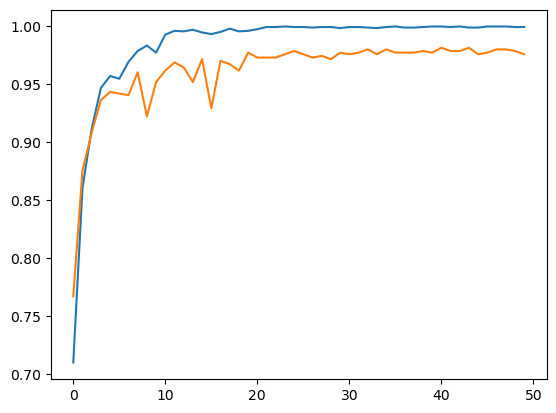

In [4]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load("results/wav2vec2_modma_1.npy", allow_pickle=True).item()
x = data['train_acc']
x_ = data['val_acc']
print(x_)
plt.plot(x)
plt.plot(x_)
plt.show()